In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [8]:
PATH = 'Crop_recommendation.csv'

# Load the CSV file data into
# data variable using pandas
data = pd.read_csv(PATH)

In [9]:
# Return the first five rows of CSV file
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
# Return information about the datatype,
# NULL type of the columns of CSV file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
# describe
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
# describe
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
# Return the number of unique labels
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
# Return the number of unique labels 
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [15]:
# Return the count of each unique label
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

/var/folders/bp/749cv7157sn5v8w2rq7crytc0000gn/T/ipykernel_65543/4220214225.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/bp/749cv7157sn5v8w2rq7crytc0000gn/T/ipykernel_65543/4220214225.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/bp/749cv7157sn5v8w2rq7crytc0000gn/T/ipykernel_65543/4220214225.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/bp/749cv7157sn5v8w2rq7crytc0000gn/T/ipykernel_65543/4220214225.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/bp/749cv7157sn5v8w2rq7crytc0000gn/T/ipykernel_65543/4220214225.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/bp/749cv7157sn5v8w2rq7crytc0000gn/T/ipykernel_65543/4220214225.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


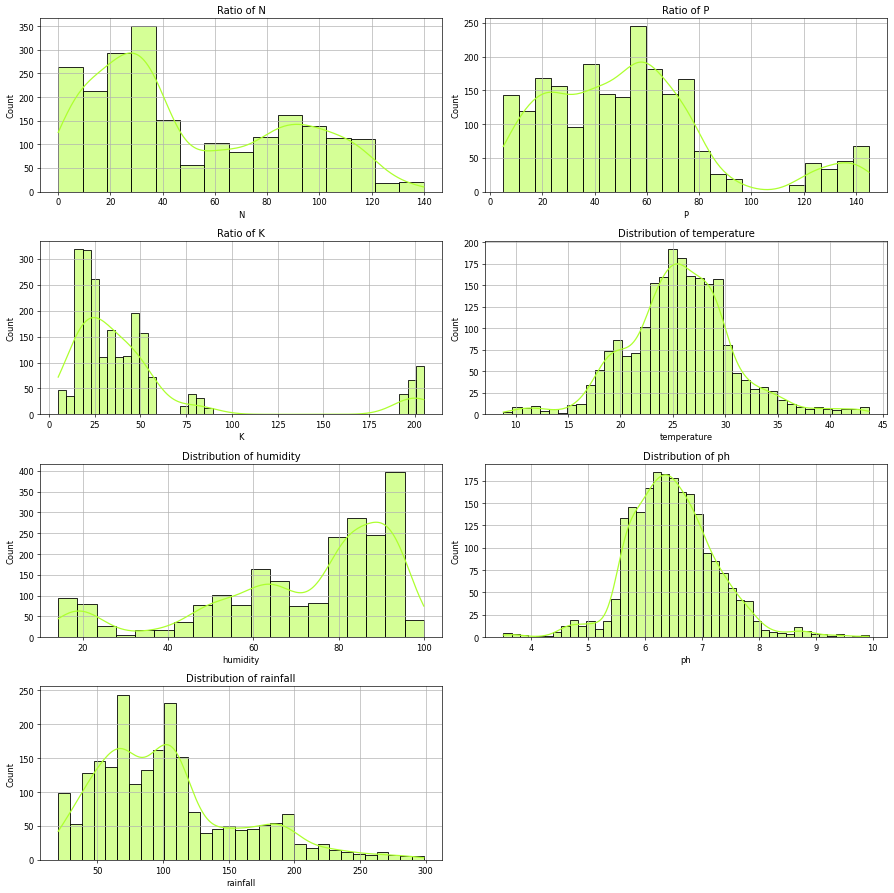

In [16]:
#Adjusting Plot Settings
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.dpi'] = 60

#This is a list that contains the names of the features (variables) you want to visualize
features = ['N', 'P', 'K', 'temperature',
            'humidity', 'ph', 'rainfall']

for i, feat in enumerate(features):
#     Creating Subplots:
    plt.subplot(4, 2, i + 1)
#     This line uses Seaborn to create a histogram (histplot) of the data for the current feature 
    sns.histplot(data[feat], color='greenyellow', kde=True)  # Use sns.histplot
    
    if i < 3:
        plt.title(f'Ratio of {feat}', fontsize=12)
    else:
        plt.title(f'Distribution of {feat}', fontsize=12)
    plt.tight_layout()
    plt.grid()

plt.show()


# The result is a set of subplots, each showing the distribution of one of the specified features 
# from the dataset, with titles indicating whether it's a "Ratio of" or a "Distribution of" that feature.
# The use of Seaborn makes it easy to create visually appealing and informative distribution plots.

/Users/nkusikevin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


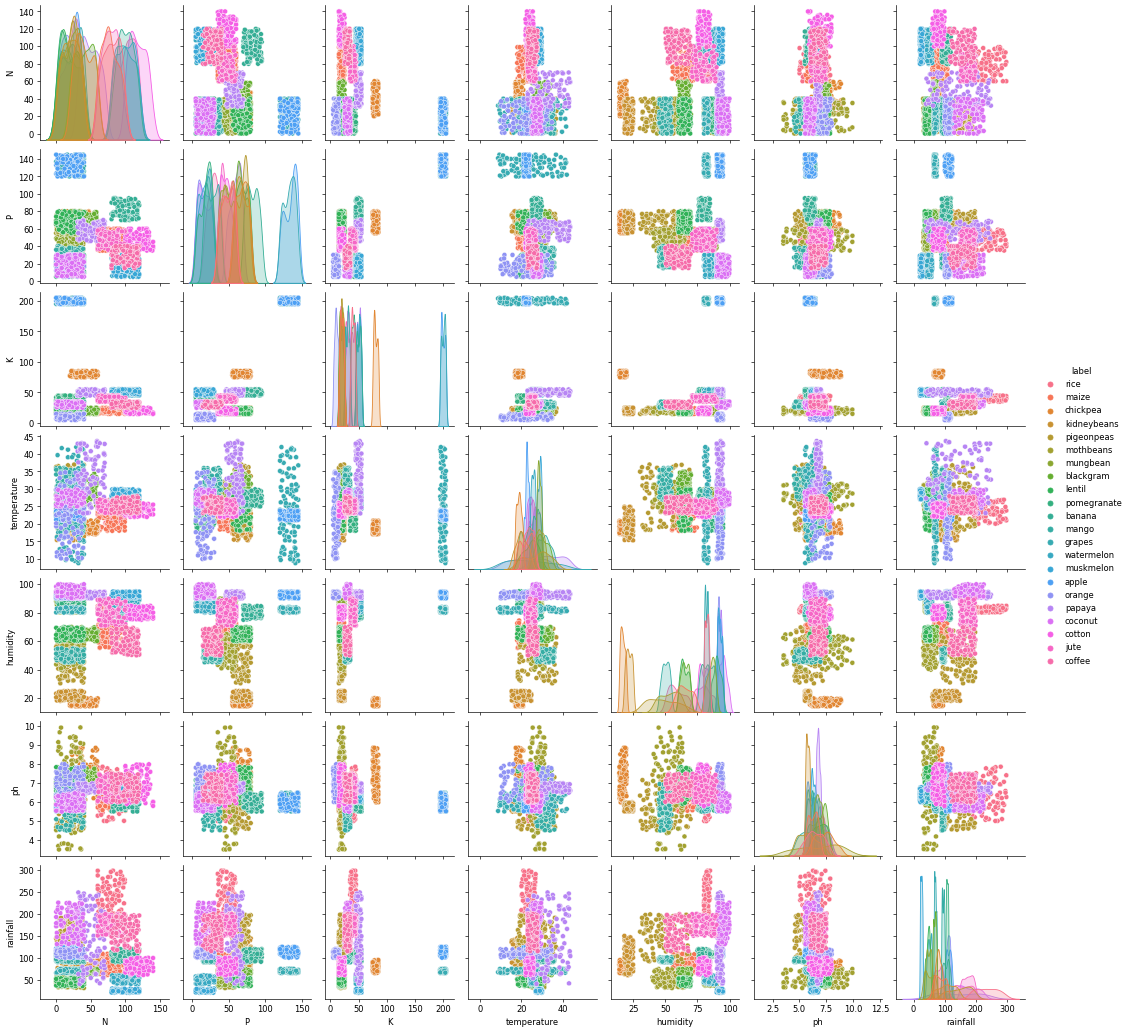

In [17]:
sns.pairplot(data, hue='label')

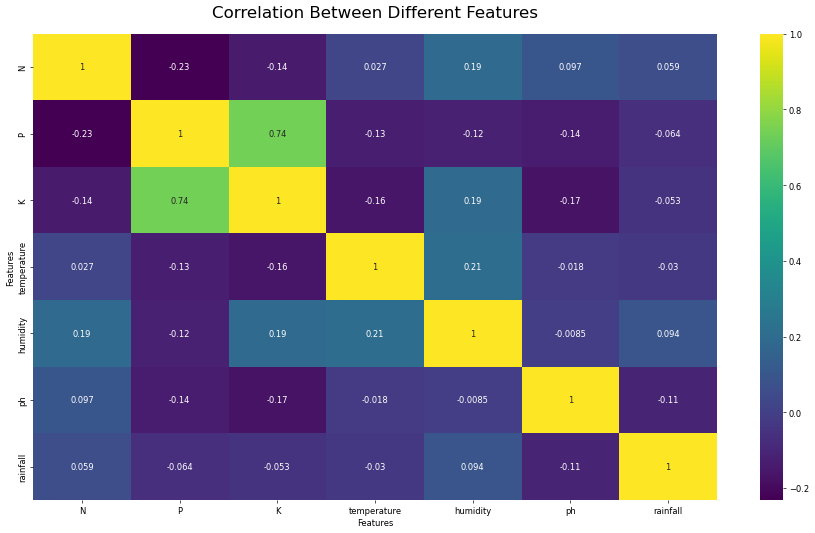

In [21]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[int, float])

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 9))

# Create the heatmap using the correlation matrix of your numeric data
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis', ax=ax)

# Set labels for the x and y axes
ax.set_xlabel('Features')
ax.set_ylabel('Features')

# Set the title with a larger fontsize and black text color
plt.title('Correlation Between Different Features', fontsize=20, color='black', pad=20)

# Show the plot
plt.show()

In [23]:
# Put all the input variables into features vector
features = data[['N', 'P', 'K', 'temperature','humidity', 'ph', 'rainfall']]

# Put all the output into labels array
labels = data['label']

In [25]:
X_train, X_test,\
Y_train, Y_test = train_test_split(features,labels,test_size=0.2,random_state=42)


In [26]:
%%capture
# Pass the training set into the
# LogisticRegression model from Sklearn
LogReg = LogisticRegression(random_state=42)\
.fit(X_train, Y_train)

# Predict the values for the test dataset
predicted_values = LogReg.predict(X_test)

# Measure the accuracy of the test 
# set using accuracy_score metric
accuracy = metrics.accuracy_score(Y_test,predicted_values)


In [27]:
# Find the accuracy of the model
print("Logistic Regression accuracy: ", accuracy)

Logistic Regression accuracy:  0.9454545454545454


In [28]:
# Get detail metrics 
print(metrics.classification_report(Y_test,predicted_values))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.95    

In [31]:
filename = 'CropRecom_LogisticRegresion.pkl'
MODELS = './model/'
# Use pickle to save ML model
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

In [35]:
#Load model for testing
loadedModel = pickle.load(open('./model/CropRecom_LogisticRegresion.pkl','rb'))

In [53]:
#NPK ,temperature ,humidity , ph ,rainfall 

# input_data_wheat = (3, 2, 1, 18, 65, 7.0, 300)



# Define feature names
feature_names = ['N', 'P', 'K', 'Temperature', 'Humidity', 'pH', 'Rainfall']

# Define input data for any crop (e.g., mangoes, or another crop)
input_data = (20, 50, 23, 20.50,37.20, 46, 20)

# Reshape the input data
input_np = np.asarray(input_data)
input_reshape = input_np.reshape(1, -1)

# Predict whether the conditions are suitable for the crop
prediction = loadedModel.predict(input_reshape)



# Print the prediction
print(f"The conditions are {prediction[0]} according to the model.")



The conditions are mothbeans according to the model.


/Users/nkusikevin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
